In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset_train = pd.read_excel('demand_jan_maio.xlsx')
dataset_train.head()

,Consumption,next 8 hour
0,56443,43926.143750
1,51642,43902.985417
2,51757,43891.245833
3,51521,43879.418750
4,51295,43867.204167


In [3]:
training_set = []
Consumption = dataset_train['Consumption']
for i in range(int(len(dataset_train)/15)):
    training_set.append(sum(Consumption[i*15:(i*15)+15]))
217440/15

14496.0

In [4]:
# training_set = dataset_train.iloc[:, 0:1].values


In [5]:
dataset_train.shape

(217440, 2)

In [6]:
dataset_train.head()


,Consumption,next 8 hour
0,56443,43926.143750
1,51642,43902.985417
2,51757,43891.245833
3,51521,43879.418750
4,51295,43867.204167


In [7]:
training_set = np.array(training_set)
training_set.shape

(14496,)

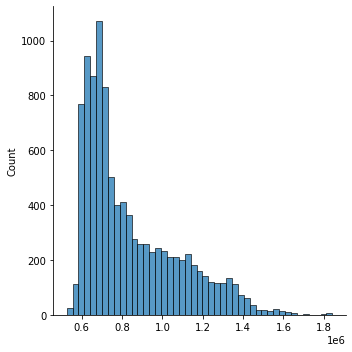

In [9]:
sns.displot(training_set[:10000])

/home/aminuninnova/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

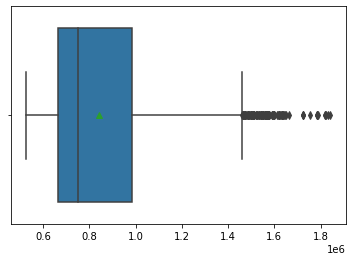

In [9]:
sns.boxplot(training_set[:10000], showmeans=True)

In [10]:
pd.DataFrame(training_set[:10000]).quantile(1)

0    1842000.0
Name: 1.0, dtype: float64

In [11]:
print(max(training_set[:10000]))

1842000


In [12]:
mu = np.mean(training_set[:10000])
std = np.std(training_set[:10000])
print(mu , std)
training_set_scaled = (training_set[:10000] - mu) / std
training_set_scaled

841602.8123 232073.30087586006


array([-0.30135656, -0.39616282, -0.43789963, ..., -0.98055576,
       -0.93773308, -0.87093092])

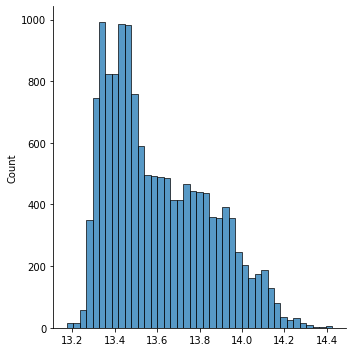

In [13]:
sns.displot(np.log(training_set))

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set[:10000].reshape(-1,1))
training_set_scaled

array([[0.18681347],
       [0.17009745],
       [0.1627385 ],
       ...,
       [0.0670586 ],
       [0.07460899],
       [0.0863874 ]])

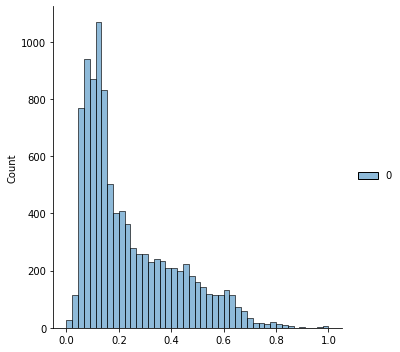

In [15]:
sns.displot(training_set_scaled)

In [16]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range=(0, 1))
# training_set_scaled = sc.fit_transform(training_set[:10000].reshape(-1,1))
# training_set_scaled

In [17]:
training_set_scaled.shape

(10000, 1)

In [18]:
print(480/15)
3 * 480 / 15

32.0


96.0

In [19]:
minutesAgoUpperBound = 96
minutesAgoLowerBound = 128

featureSize = minutesAgoLowerBound - minutesAgoUpperBound

minutespredict = 1
X_train = []
y_train = []
for i in range(minutesAgoLowerBound, 10000 - minutespredict):
    X_train.append(training_set_scaled[i - minutesAgoLowerBound:i-minutesAgoUpperBound, 0])
    y_train.append(training_set_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(9871, 32, 1)

In [20]:
y_train.shape

(9871, 1)

In [21]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

2022-09-19 15:12:40.771331: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-19 15:12:40.771365: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [24]:
model = Sequential()
model.add(LSTM(units=30,return_sequences=True,input_shape=(X_train.shape[1], 1)))
# model.add(Dropout(0.2))
model.add(LSTM(units=30,return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(units=30,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=30))
model.add(Dropout(0.2))
# model.add(Dense(units=minutespredict))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 32, 30)            3840      
                                                                 
 lstm_5 (LSTM)               (None, 32, 30)            7320      
                                                                 
 lstm_6 (LSTM)               (None, 32, 30)            7320      
                                                                 
 dropout_2 (Dropout)         (None, 32, 30)            0         
                                                                 
 lstm_7 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [26]:
# model.load_weights('4layerLSTM_2DropOut.h5')
model.fit(X_train,y_train,epochs=100, batch_size=1000)

In [39]:
model.save('4layerLSTM_2DropOut.h5')

In [27]:
# url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
# dataset_test = pd.read_csv(url)
# real_stock_price = dataset_test.iloc[:, 1:2].values
real_Consumption = training_set[10000:]
# real_Consumption = sc.transform(real_Consumption.reshape(-1,1))
real_Consumption

array([609481, 629571, 629000, ..., 876344, 835274, 824022])

In [28]:
# minutespredict = 480
# minutesAgo = 100

In [29]:
# training_set[10000 - minutesAgoLowerBound:].shape

In [33]:
# dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# inputs = dataset_train[len(dataset_total) - len(dataset_test) - 60:].values
inputs = training_set[10000 - minutesAgoLowerBound:]
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(minutesAgoLowerBound, len(inputs)):
    X_test.append(inputs[i-minutesAgoLowerBound:i-minutesAgoUpperBound, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(4496, 32, 1)

In [34]:
predicted_Consumption = model.predict(X_test)
# predicted_Consumption = sc.inverse_transform(predicted_Consumption)
predicted_Consumption.min()

0.0727355

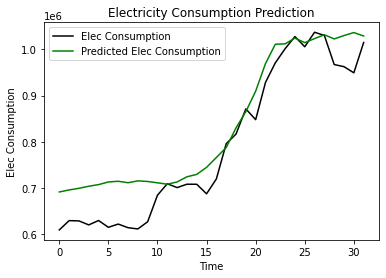

In [39]:

plt.plot(real_Consumption[:32], color = 'black', label = 'Elec Consumption')
plt.plot(sc.inverse_transform(predicted_Consumption[:32]), color = 'green', label = 'Predicted Elec Consumption')
plt.title('Electricity Consumption Prediction')
plt.xlabel('Time')
plt.ylabel('Elec Consumption')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(real_Consumption[:32], sc.inverse_transform(predicted_Consumption[:32]))
print('mse: ', MSE)
print('RMSE: ', math.sqrt(MSE))

mse:  3290452481.6833496
RMSE:  57362.465791520415


In [46]:
2500%24

4